In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading Library

In [2]:
df=pd.read_csv(r'C:\Users\Ankita\Desktop\loan.csv')

EDA

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loading the data First 5 rows

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Loading the data First 5 rows

In [5]:
df.shape

(614, 13)

there 614 rows 13 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Describe dataset information

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There was missing values is present in many columns in this dataset

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Describe dataset columns

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Describe dataset columns type

In [10]:
df = df.drop(['Loan_ID'], axis = 1)

Here drop Loan_ID column because it is not much important

In [11]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

Describe target columns unique values

In [12]:
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There was no blank space present in target columns

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Describe dataset

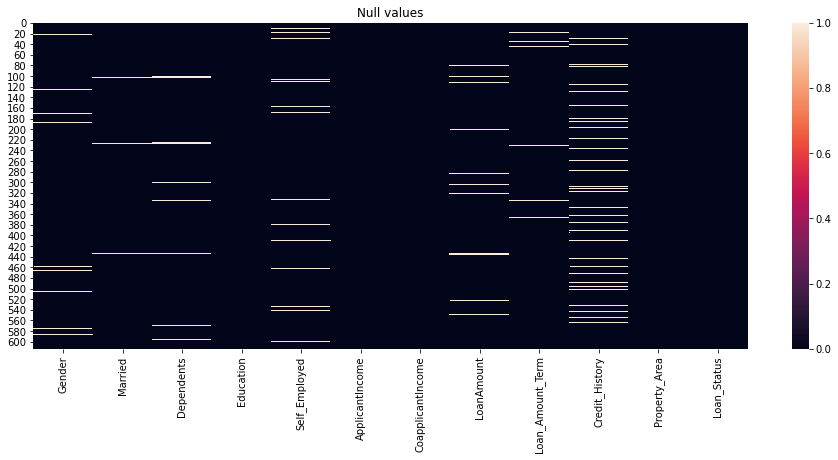

In [14]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Heatmap shows null values is present

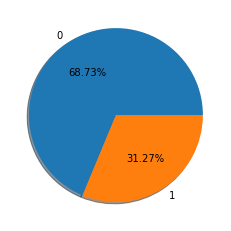

In [15]:
labels='0','1'
fig, ax = plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

Target variable piechart

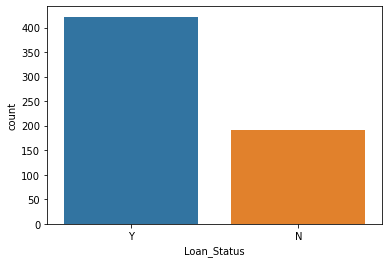

In [16]:
sns.countplot(df['Loan_Status']);

Distribution of target column

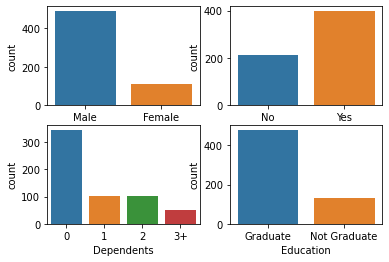

In [17]:
plt.figure(1)
plt.subplot(221)
sns.countplot(df['Gender']);

plt.subplot(222)
sns.countplot(df['Married']);

plt.subplot(223)
sns.countplot(df['Dependents']);

plt.subplot(224)
sns.countplot(df['Education']);
plt.show()

Distribution of Married,Dependents,Education column

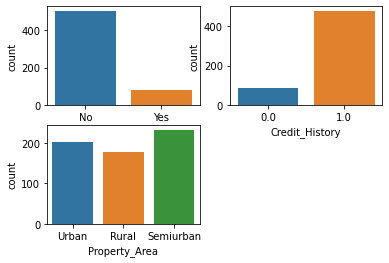

In [18]:
plt.figure(1)
plt.subplot(221)
sns.countplot(df['Self_Employed']);

plt.subplot(222)
sns.countplot(df['Credit_History']);

plt.subplot(223)
sns.countplot(df['Property_Area']);

plt.show()

Distribution of Self_Employed,Credit_History,Property_Area column

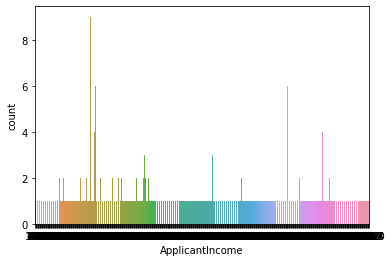

In [19]:
sns.countplot(df['ApplicantIncome']);

Distribution of ApplicantIncome column

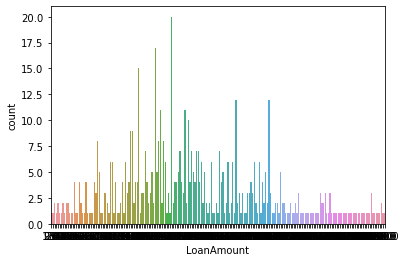

In [20]:
sns.countplot(df['LoanAmount']);

Distribution of LoanAmount column

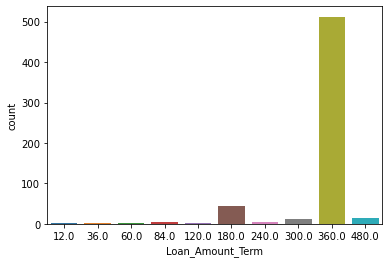

In [21]:
sns.countplot(df['Loan_Amount_Term']);

Distribution of Loan_Amount_Term column

Bi varient Analysis:

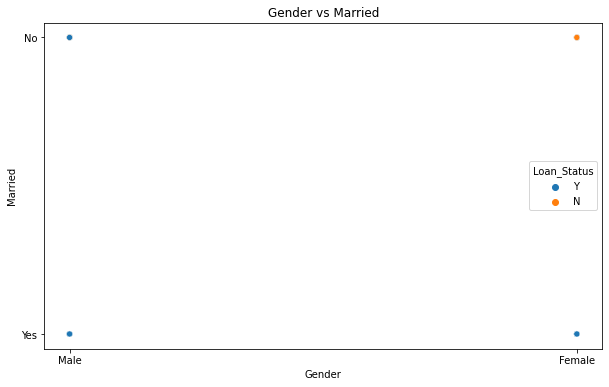

In [22]:
plt.figure(figsize=[10,6])
plt.title('Gender vs Married')
sns.scatterplot(df["Gender"],df["Married"],hue=df["Loan_Status"])
plt.show()

Comparision between 2 columns column hue to Target column

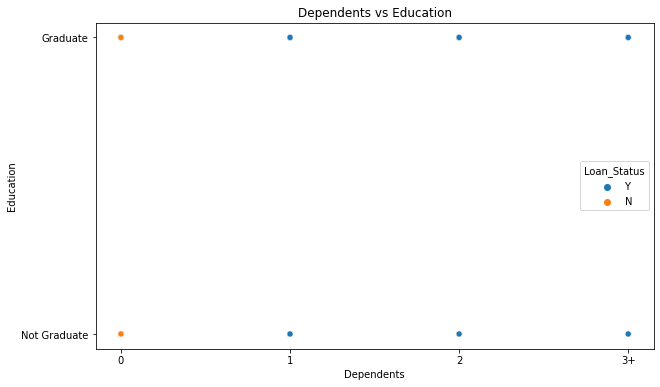

In [23]:
plt.figure(figsize=[10,6])
plt.title('Dependents vs Education')
sns.scatterplot(df["Dependents"],df["Education"],hue=df["Loan_Status"])
plt.show()

Comparision between 2 columns column hue to Target column

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


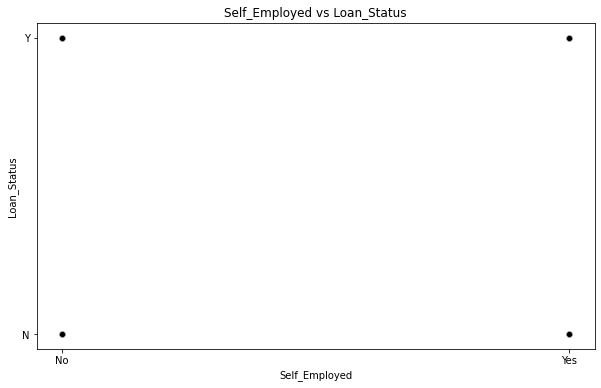

In [165]:
plt.figure(figsize=[10,6])
plt.title('Self_Employed vs Loan_Status')
sns.scatterplot(df["Self_Employed"],df["Loan_Status"],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.show()

Comparision between 2 columns

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<AxesSubplot:xlabel='Gender'>

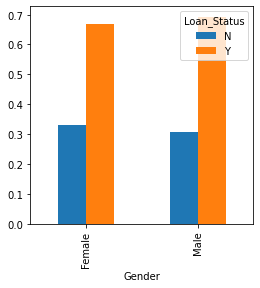

In [166]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))


Distribution between 2 columns

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


<AxesSubplot:xlabel='Married'>

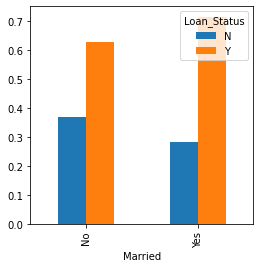

In [167]:
print(pd.crosstab(df['Married'],df['Loan_Status']))
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))

Distribution between 2 columns

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


<AxesSubplot:xlabel='Dependents'>

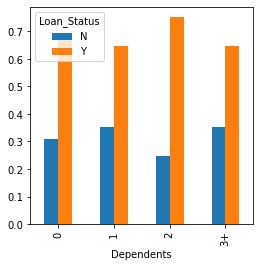

In [168]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))

Distribution between 2 columns

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


<AxesSubplot:xlabel='Education'>

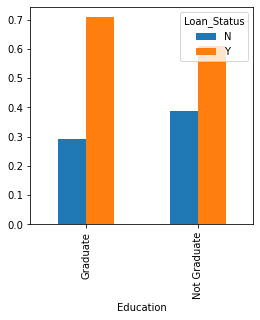

In [169]:
print(pd.crosstab(df['Education'],df['Loan_Status']))
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))

Distribution between 2 columns

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<AxesSubplot:xlabel='Self_Employed'>

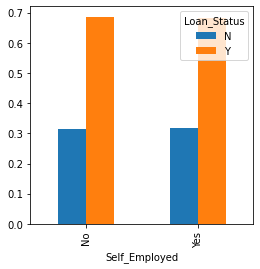

In [170]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))

Distribution between 2 columns

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


<AxesSubplot:xlabel='Credit_History'>

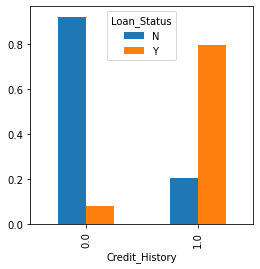

In [171]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))

Distribution between 2 columns

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<AxesSubplot:xlabel='Property_Area'>

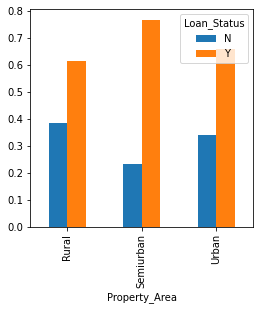

In [172]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))

Distribution between 2 columns

<AxesSubplot:xlabel='Loan_Status'>

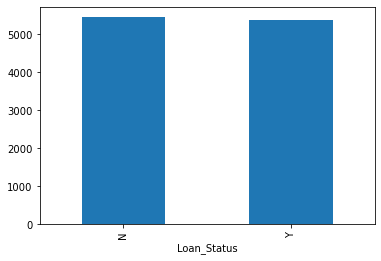

In [173]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


Distribution between 2 columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


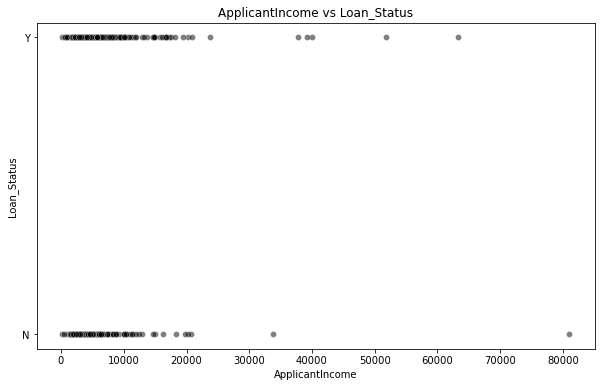

In [174]:
plt.figure(figsize=[10,6])
plt.title('ApplicantIncome vs Loan_Status')
sns.scatterplot(df["ApplicantIncome"],df["Loan_Status"],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.show()

Distribution between 2 columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


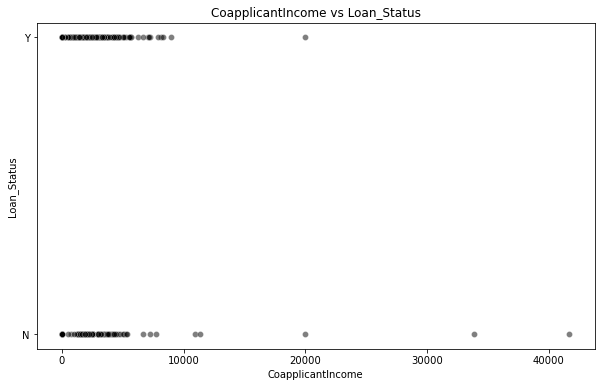

In [175]:
plt.figure(figsize=[10,6])
plt.title('CoapplicantIncome vs Loan_Status')
sns.scatterplot(df["CoapplicantIncome"],df["Loan_Status"],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.show()

Distribution between 2 columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


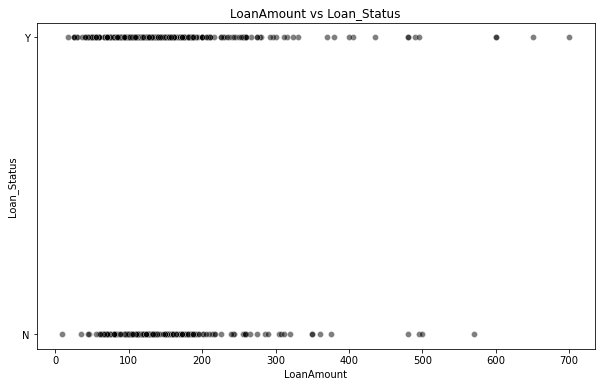

In [176]:
plt.figure(figsize=[10,6])
plt.title('LoanAmount vs Loan_Status')
sns.scatterplot(df["LoanAmount"],df["Loan_Status"],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.show()

Distribution between 2 columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


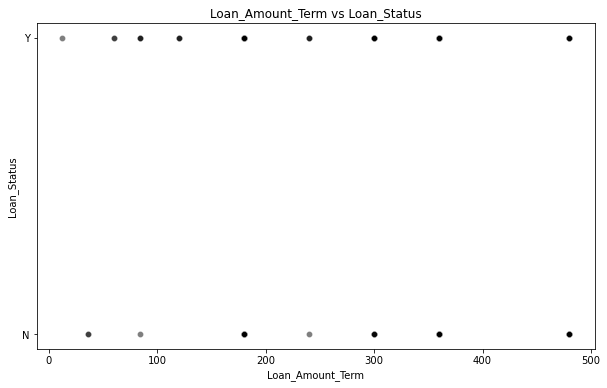

In [177]:
plt.figure(figsize=[10,6])
plt.title('Loan_Amount_Term vs Loan_Status')
sns.scatterplot(df["Loan_Amount_Term"],df["Loan_Status"],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.show()

Distribution between 2 columns

In [24]:
df['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)

Replace the values od Dependents column

In [25]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

Replace values of categorical column

Checking Distribution:

<AxesSubplot:xlabel='Gender', ylabel='Density'>

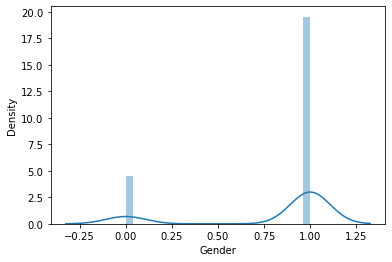

In [26]:
sns.distplot(df["Gender"])

<AxesSubplot:xlabel='Married', ylabel='Density'>

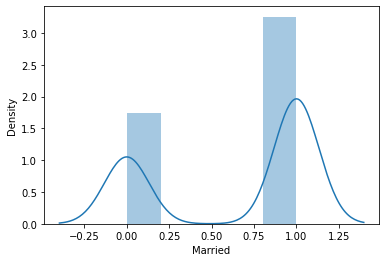

In [181]:
sns.distplot(df["Married"])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

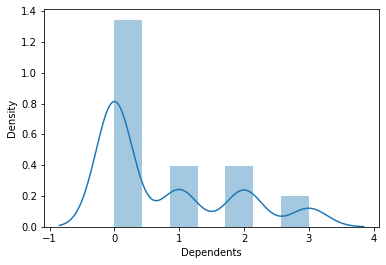

In [182]:
sns.distplot(df["Dependents"])

<AxesSubplot:xlabel='Education', ylabel='Density'>

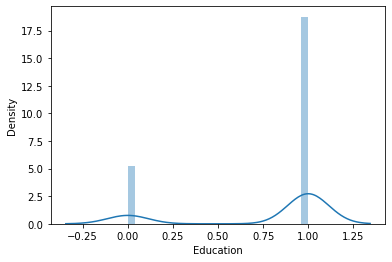

In [184]:
sns.distplot(df["Education"])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

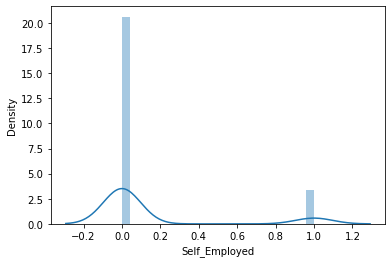

In [185]:
sns.distplot(df["Self_Employed"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

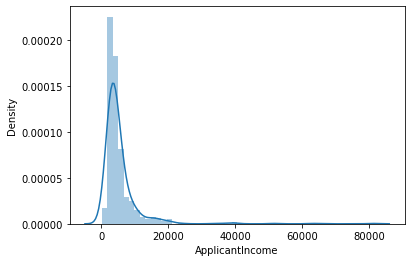

In [186]:
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

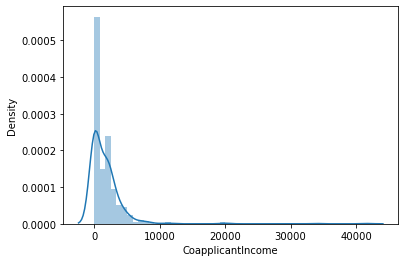

In [187]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

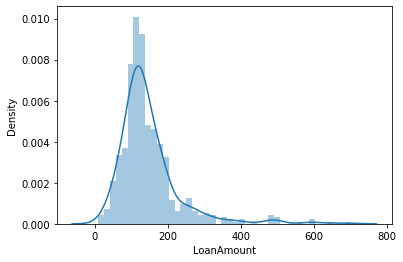

In [188]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

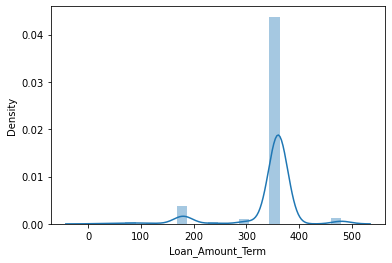

In [190]:
sns.distplot(df["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

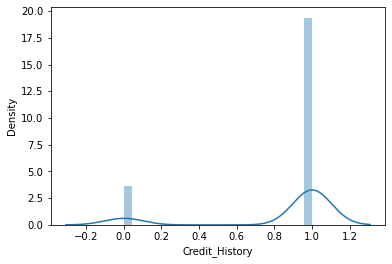

In [191]:
sns.distplot(df["Credit_History"])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

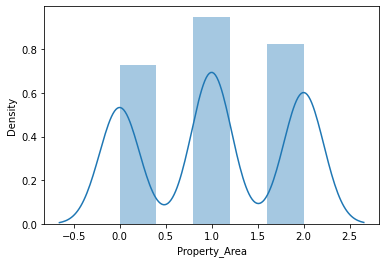

In [192]:
sns.distplot(df["Property_Area"])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

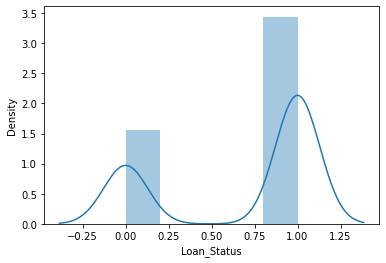

In [193]:
sns.distplot(df["Loan_Status"])

Here data is normally distributed

Checking Outliers:

<AxesSubplot:xlabel='Gender'>

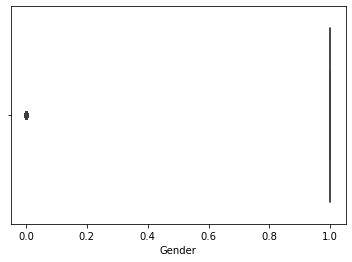

In [194]:
sns.boxplot(df["Gender"])

<AxesSubplot:xlabel='Married'>

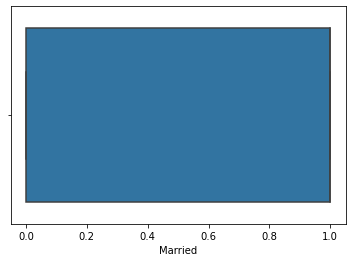

In [195]:
sns.boxplot(df["Married"])

<AxesSubplot:xlabel='Dependents'>

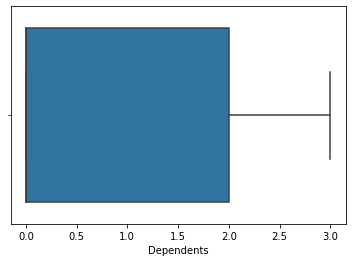

In [196]:
sns.boxplot(df["Dependents"])

<AxesSubplot:xlabel='Education'>

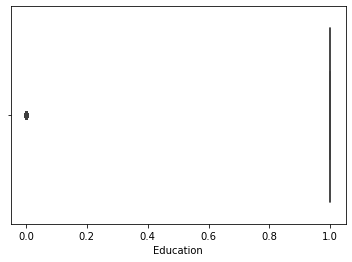

In [197]:
sns.boxplot(df["Education"])

<AxesSubplot:xlabel='Self_Employed'>

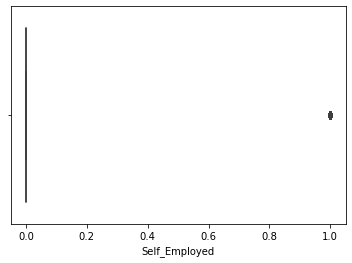

In [198]:
sns.boxplot(df["Self_Employed"])

<AxesSubplot:xlabel='ApplicantIncome'>

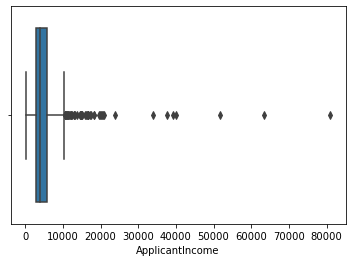

In [199]:
sns.boxplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

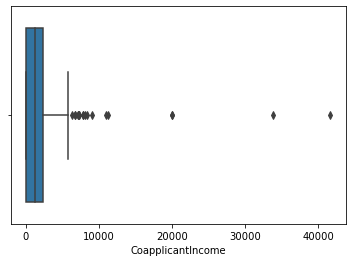

In [200]:
sns.boxplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

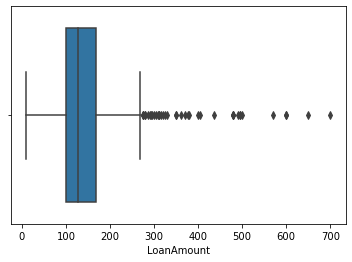

In [201]:
sns.boxplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term'>

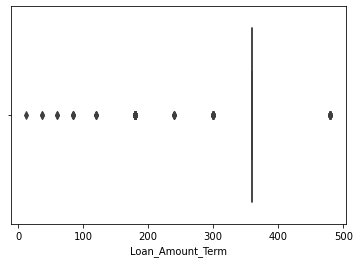

In [202]:
sns.boxplot(df["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History'>

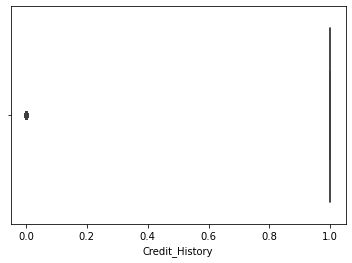

In [203]:
sns.boxplot(df["Credit_History"])

<AxesSubplot:xlabel='Property_Area'>

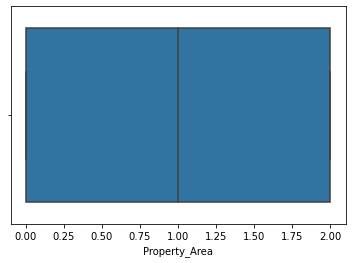

In [204]:
sns.boxplot(df["Property_Area"])

<AxesSubplot:xlabel='Loan_Status'>

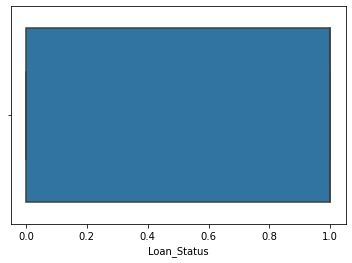

In [205]:
sns.boxplot(df["Loan_Status"])

Here Outlier is present in many columns

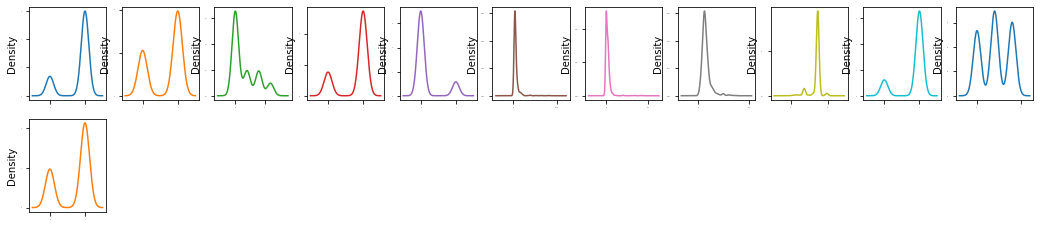

In [206]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

Distribution of all columns

In [220]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

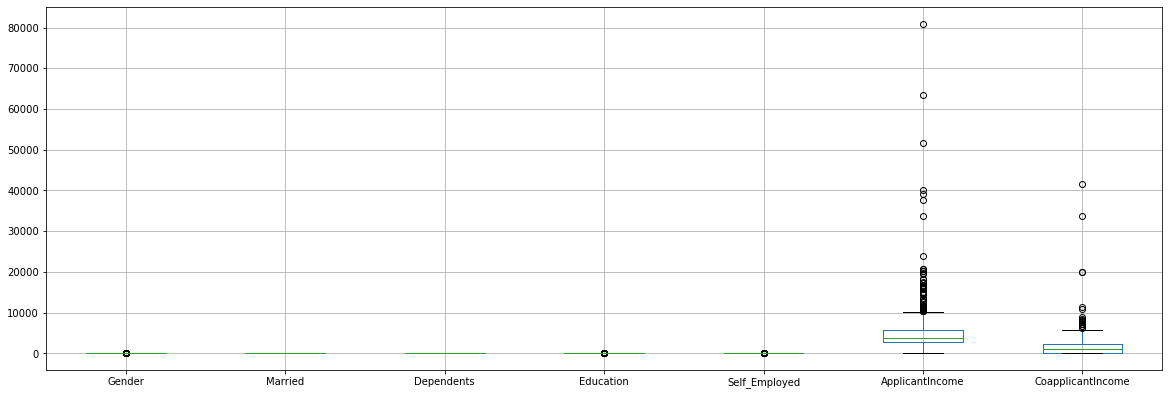

In [221]:
x.iloc[:,0:7].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

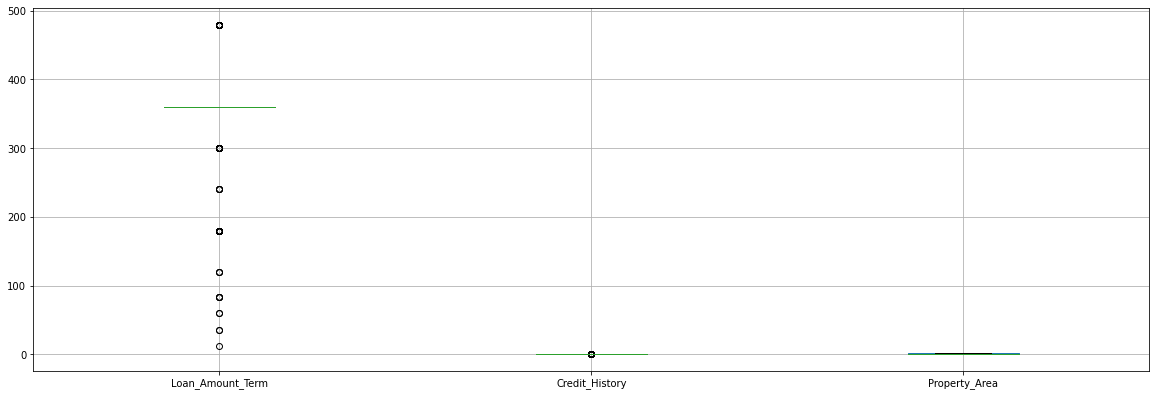

In [222]:
x.iloc[:,8:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

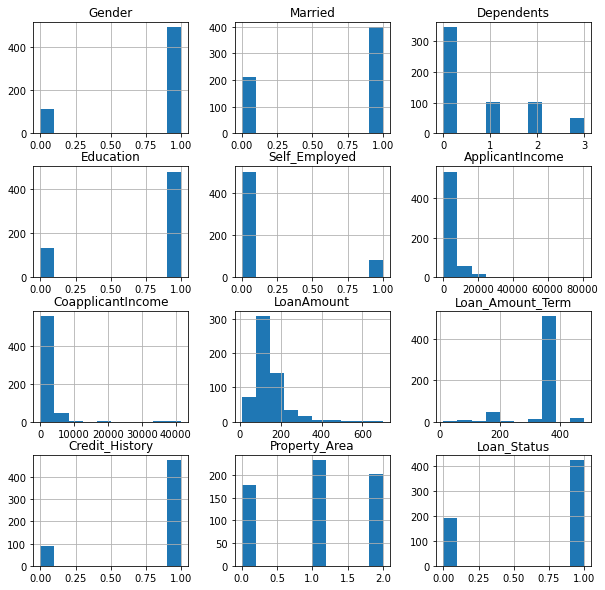

In [224]:
df.hist( bins = 10, figsize = (10,10))
plt.show()

Bar plot of all columns

Multivarient Analysis:

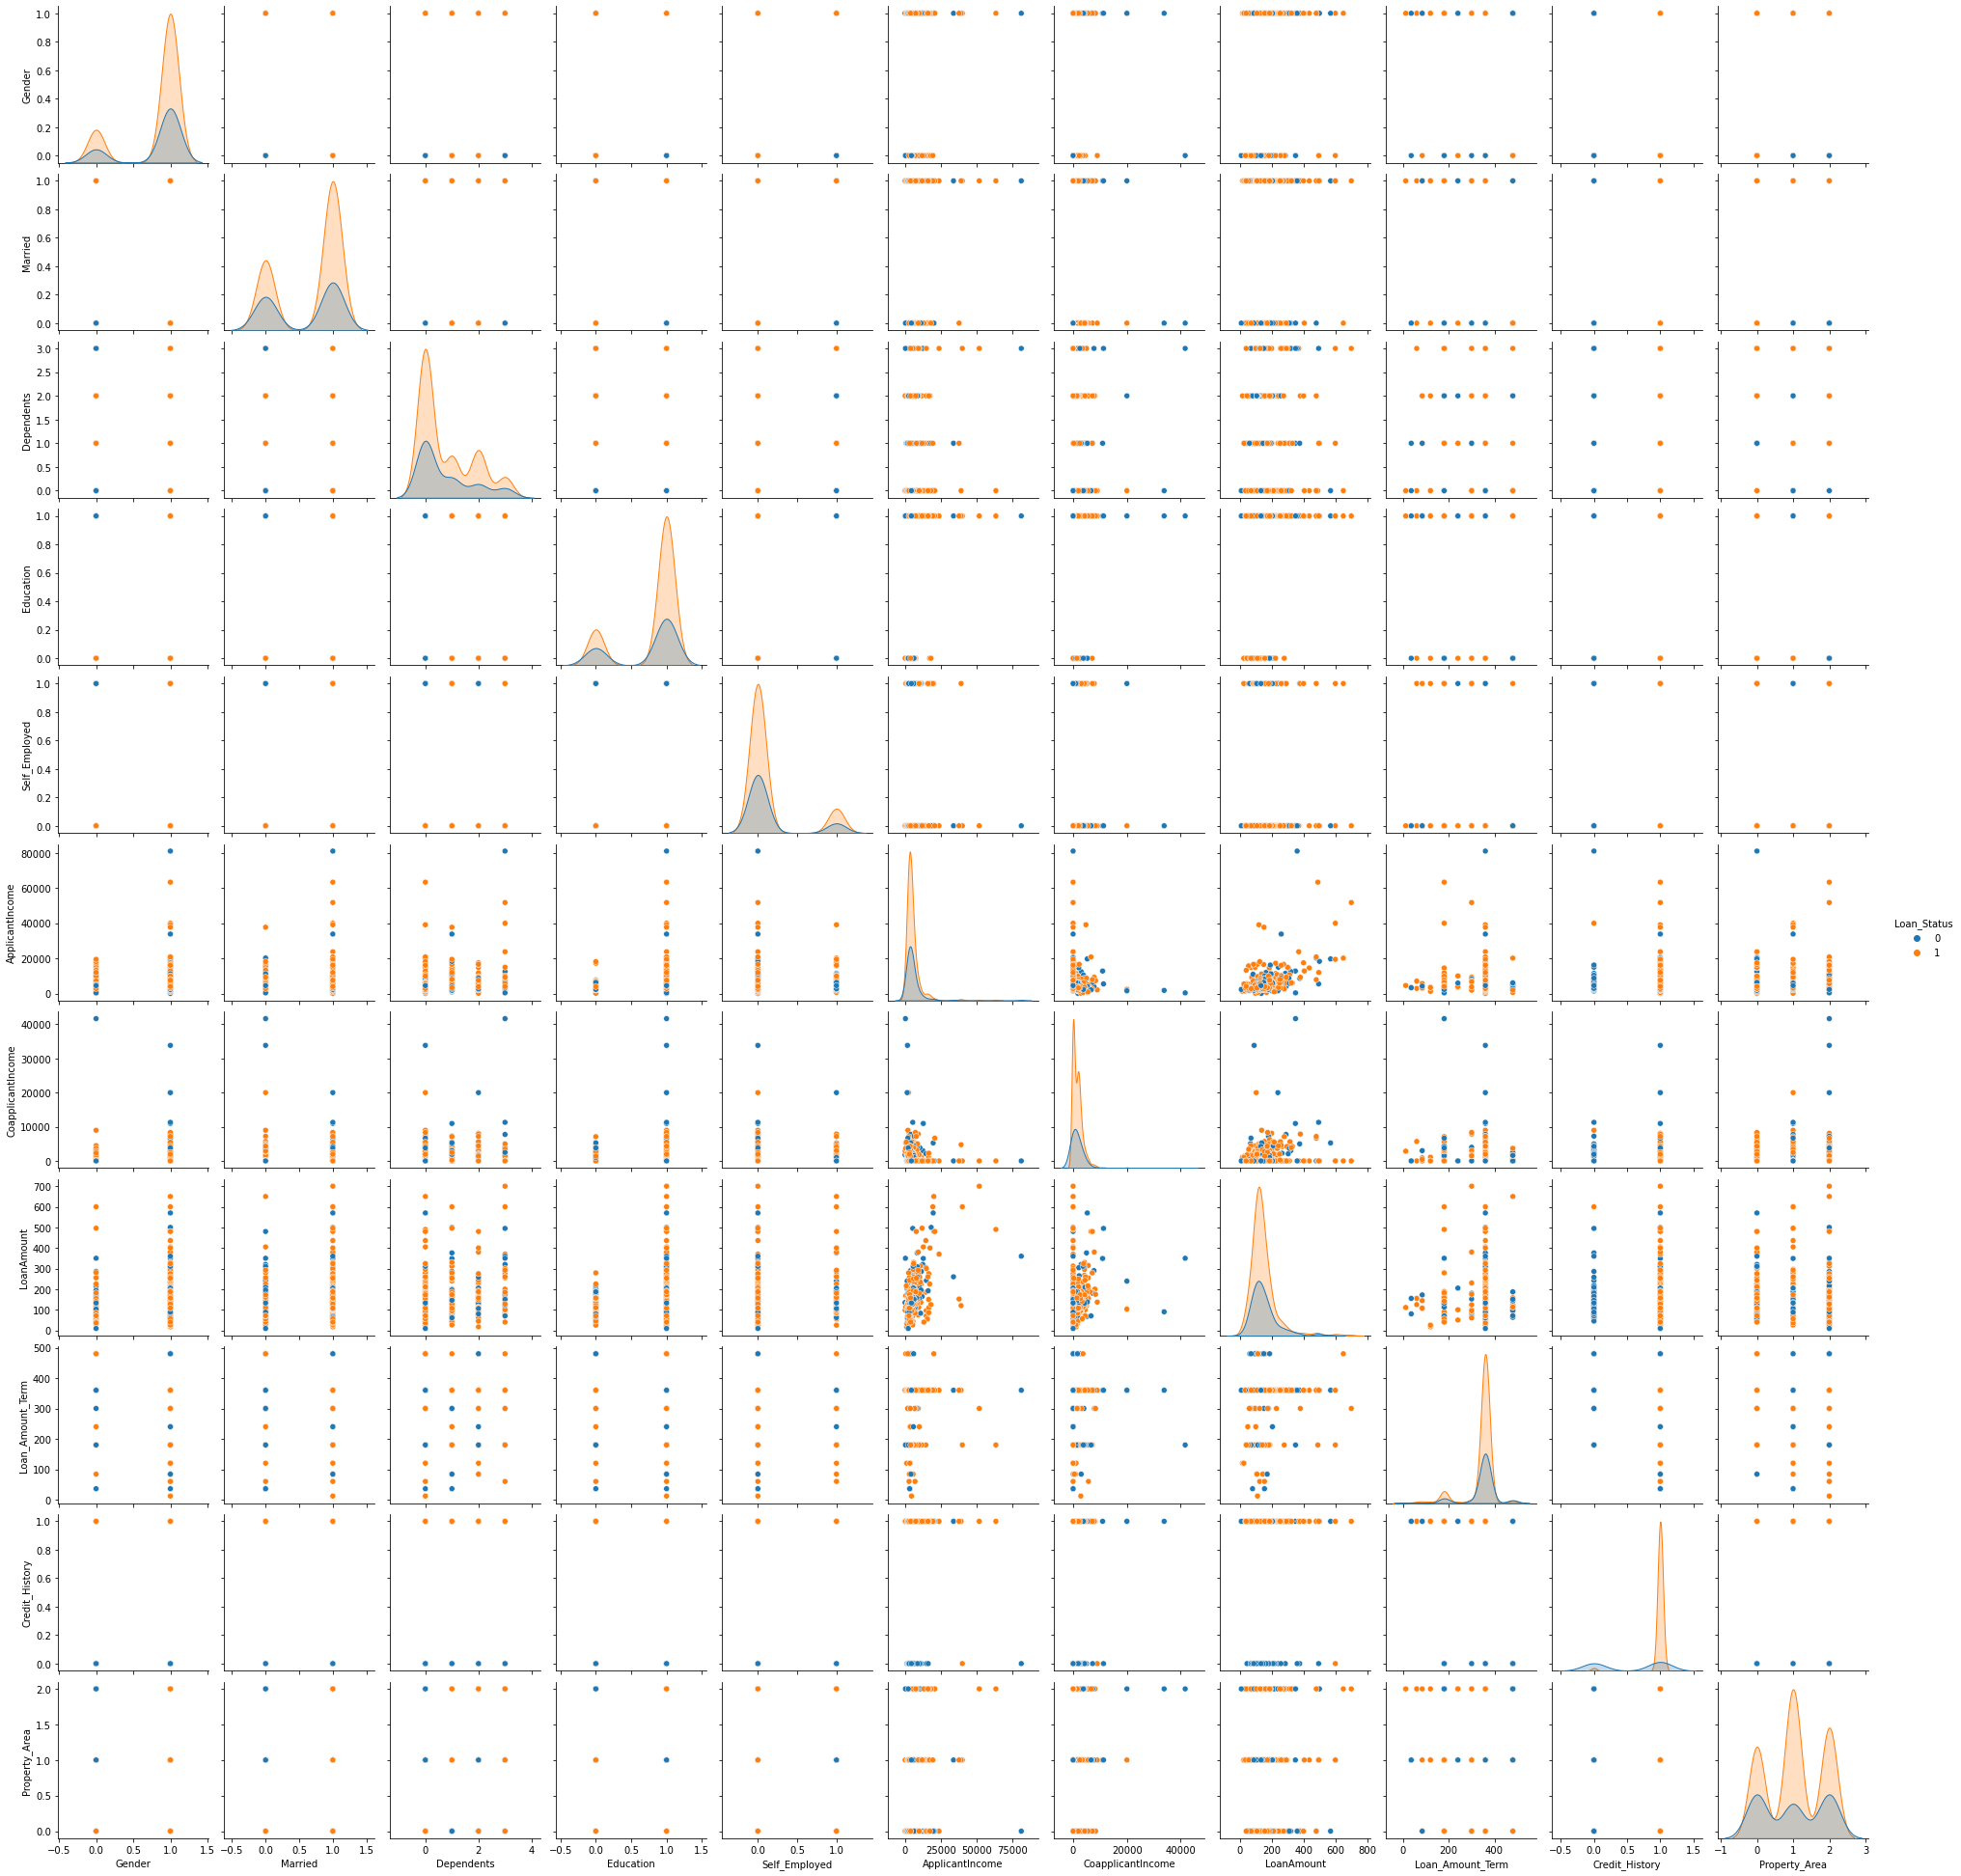

In [223]:
sns.pairplot(df, hue='Loan_Status')

In [334]:
cor=df.corr()

In [335]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.175970,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.024556,0.019857
Married,0.369612,1.000000,0.343417,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.002918,0.089280
Dependents,0.175970,0.343417,1.000000,-0.059161,0.057867,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006828,0.006781
Education,-0.049258,-0.014223,-0.059161,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.065243,0.085884
Self_Employed,-0.009829,0.001909,0.057867,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303
ApplicantIncome,0.053989,0.051332,0.118679,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.083946,0.077770,0.027259,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.106947,0.149519,0.163997,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,-0.100484,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,0.016337,0.004381,-0.050082,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678


<AxesSubplot:>

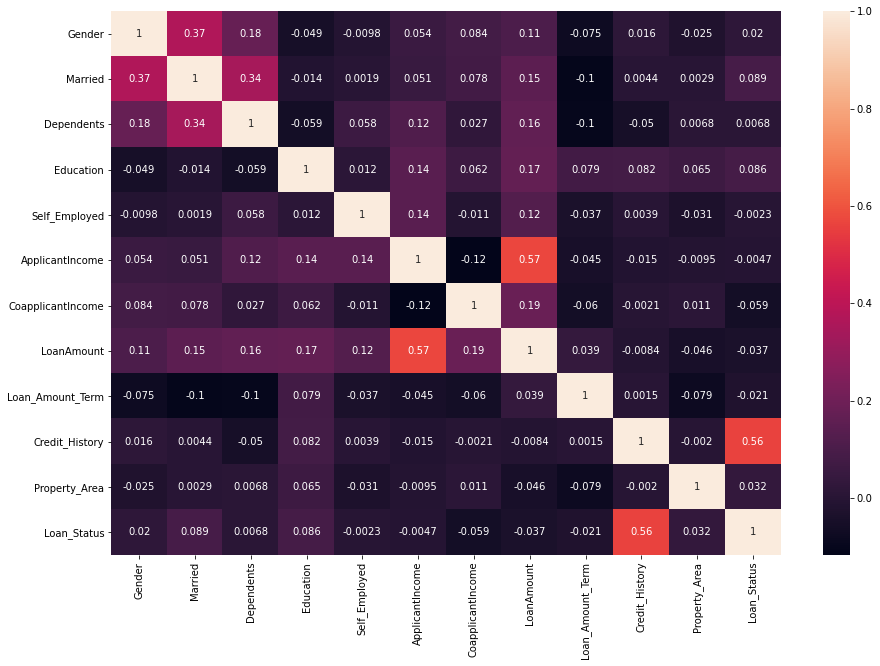

In [336]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Checking correlation of all the independent column with target column

In [337]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Datatypes of all columns

In [229]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


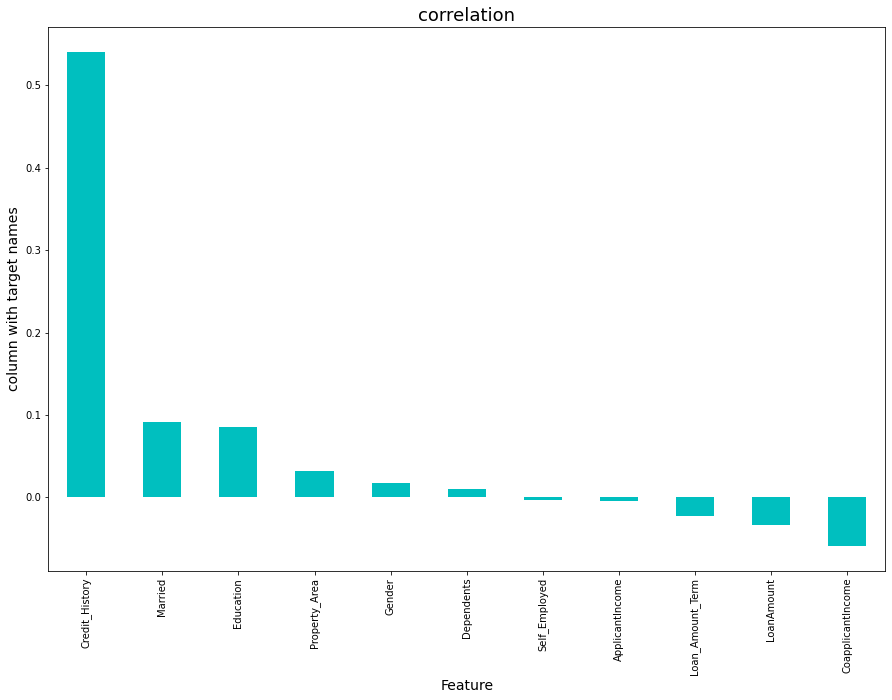

In [238]:
plt.figure(figsize=(15,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Correlation in different way

In [27]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checking null values

In [28]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Fill the null values

In [29]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [31]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [32]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After fill null values

Oversampling:

In [33]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [34]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y = SM.fit_resample(x,y)

In [35]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

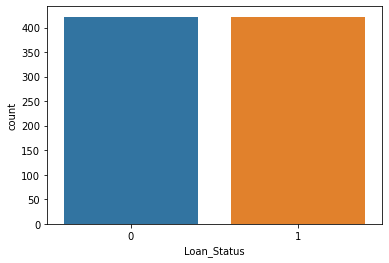

In [36]:
sns.countplot(y)

After balance the class

Use zscore method for data loss:

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [38]:
new_df.shape

(577, 12)

In [39]:
df.shape

(614, 12)

In [40]:
Data_loss=((614-577)/614)*100

In [41]:
Data_loss

6.026058631921824

Here 6.02 persent dataloss using zscore

Use IQR technique for data loss:

In [42]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [43]:
df_new.shape

(207, 12)

Using IQR more dataloss

Checking skewness:

In [44]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [45]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

Use power transform to remove skewness

In [253]:
df['Gender']=np.log(df['Gender'])

In [254]:
df['Education']=np.log(df['Education'])

In [255]:
df['Self_Employed']=np.log(df['Self_Employed'])

In [256]:
df['Credit_History']=np.log(df['Credit_History'])

In [260]:
df['Loan_Status']=np.log(df['Loan_Status'])

Use log method to remove skewness

In [261]:
df.skew()

Gender               0.000000
Married             -0.644850
Dependents           0.441404
Education            0.000000
Self_Employed        0.000000
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term     0.392571
Credit_History       0.000000
Property_Area       -0.158267
Loan_Status          0.000000
dtype: float64

After Removing Skewness

Apply MinMax Scaler:

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [47]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Importing Libraryies

In [346]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=52)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"on Random_state ",maxRS)

Best accuracy is 0.7440944881889764 on Random_state  1
Best accuracy is 0.7480314960629921 on Random_state  4
Best accuracy is 0.7519685039370079 on Random_state  7
Best accuracy is 0.7559055118110236 on Random_state  17
Best accuracy is 0.7598425196850394 on Random_state  19
Best accuracy is 0.7677165354330708 on Random_state  99


Use different models to select best accracy score and select best model.

In [347]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=52)

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [349]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       125
           1       0.78      0.70      0.74       129

    accuracy                           0.75       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.75      0.75       254

[[100  25]
 [ 39  90]]


Check DecisionTreeClassifier Accuracy score

In [350]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       125
           1       0.80      0.91      0.85       129

    accuracy                           0.84       254
   macro avg       0.85      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254

[[ 96  29]
 [ 12 117]]


Check RandomForestClassifier Accuracy score

In [351]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       125
           1       0.69      0.88      0.77       129

    accuracy                           0.74       254
   macro avg       0.76      0.74      0.73       254
weighted avg       0.76      0.74      0.73       254

[[ 75  50]
 [ 16 113]]


Check SVC Accuracy score

In [352]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Importing Libraryies

In [353]:
Ad = AdaBoostClassifier()
Ad.fit(x_train, y_train)
pred = Ad.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       125
           1       0.76      0.85      0.80       129

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254

[[ 90  35]
 [ 19 110]]


Check AdaBoostClassifier Accuracy score

In [354]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
pred = GB.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       125
           1       0.80      0.91      0.85       129

    accuracy                           0.83       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.84      0.83      0.83       254

[[ 95  30]
 [ 12 117]]


Check GradientBoostingClassifier Accuracy score

In [355]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       125
           1       0.69      0.82      0.75       129

    accuracy                           0.72       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.73      0.72      0.72       254

[[ 78  47]
 [ 23 106]]


Check LogisticRegression Accuracy score

In [363]:
Ga =  GaussianNB()
Ga.fit(x_train, y_train)
pred = Ga.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.54      0.67       125
           1       0.68      0.94      0.79       129

    accuracy                           0.74       254
   macro avg       0.78      0.74      0.73       254
weighted avg       0.78      0.74      0.73       254

[[ 67  58]
 [  8 121]]


Check GaussianNB Accuracy score

In [357]:
KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
pred = KN.predict(x_test)
acc=classification_report(y_test, pred)
print(acc)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       125
           1       0.71      0.84      0.77       129

    accuracy                           0.75       254
   macro avg       0.76      0.75      0.74       254
weighted avg       0.76      0.75      0.75       254

[[ 81  44]
 [ 20 109]]


Check KNeighborsClassifier Accuracy score

In [358]:
from sklearn.model_selection import cross_val_score

In [359]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7950549450549451


In [360]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8401451112989575


In [361]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.7477247111862496


In [306]:
print(cross_val_score(Ad,x,y,cv=5).mean())

0.7891730064806988


In [307]:
print(cross_val_score(GB,x,y,cv=5).mean())

0.8140955198647507


In [308]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.734650605804452


In [362]:
print(cross_val_score(Ga,x,y,cv=5).mean())

0.74652719075796


In [310]:
print(cross_val_score(KN,x,y,cv=5).mean())

0.7216398985629755


Checking cross validation score of all algorithm

Here RandomForestClassifier are best and high Accuracy score so apply Hyper parameter tunning on it

In [364]:
from sklearn.model_selection import GridSearchCV

Import GridsearcgCv

In [365]:
import numpy as np

In [366]:
parameters = {'n_estimators': [200,700],
                'max_features': ['auto','sqrt','log2'],
                 'max_depth': [4,5,6,7,8],
              'criterion' : ['gini','entropy']}

Import parameters

In [367]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

Import GridSearchCV library

In [368]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [369]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

Best parameter list of RandomForestClassifier

In [370]:
Final_mod2 = RandomForestClassifier(criterion= 'entropy',max_depth=8,max_features='sqrt',n_estimators=700)
Final_mod2.fit(x_train,y_train)
pred = Final_mod2.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.85826771653542


Finally print best score

In [371]:
from sklearn.metrics import plot_roc_curve

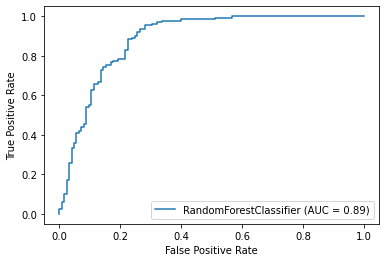

In [372]:
plot_roc_curve(Final_mod2,x_test,y_test)

AUC AND ROC curve

In [374]:
import joblib
joblib.dump(Final_mod2,"Loan.pk1")

['Loan.pk1']

Importing the model

In [375]:
model=joblib.load("Loan.pk1")

Loading the model

In [376]:
print(model.predict(x_test))

[1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0]


Finally creating best model